In [2]:
import numpy as np 
from ncon import ncon 
from scipy.linalg import expm
import matplotlib.pyplot as plt 

$$H=-J\sum_{ij} \sigma_i^z \sigma_j^z-h\sum_i \sigma_i^x$$

In [3]:
def IsingModel(J:int,h:int,δ:float):
    Id = np.identity(2)
    X = np.array([[0,1],[1,0]])
    Y = np.array([[0, -1j],[1j, 0]])
    Z = np.array([[1,0],[0,-1]])
    # H = Hz + Hx
    Hz = ncon([Z,Z],[[-1,-3],[-2,-4]])
    Hx = ncon([X,Id],[[-1,-3],[-2,-4]]) + ncon([Id, X],[[-1,-3],[-2,-4]])
    H = J*Hz -h*Hx
    H_reshaped = np.reshape(H,[4,4])
    Ug = expm(δ*H_reshaped)
    Ug = np.reshape(Ug,[2,2,2,2])
    M = ncon([Z,Z],[[-1,-3],[-2,-4]])
    return H, Ug, M
    

In [4]:
def TensorCreation(d:int, D:int):
#     np.random.seed(42)
    ΓA = np.random.rand(D,D,d)
    ΓB = np.random.rand(D,D,d)
    ΓA = ΓA / np.linalg.norm(ΓA)
    ΓB = ΓB / np.linalg.norm(ΓB)
    Γ = [ΓA, ΓB]
    
    λA = np.random.rand(D)
    λB = np.random.rand(D)
    λA = λA/np.sum(λA)
    λB = λB/np.sum(λB)
    λ = [λA, λB]
    return λ , Γ

In [5]:
def ITEBD(d,D,J,h,δ,n_iter):
    # create tensors
    λ , Γ = TensorCreation(d,D)
    # define H and U
    H, Ug, M = IsingModel(J,h,δ)
    # start iteration
    for step in range(n_iter):
        if np.mod(step, 2) == 0:
            A = 0; B = 1;
        else:
            A = 1; B = 0;
            
        tensors = [np.diag(λ[B]), Γ[A], np.diag(λ[A]), Γ[B], np.diag(λ[B]), Ug]
        connect = [[-1,1],[1,2,3],[2,4],[4,5,6],[5,-3],[3,6,-2,-4]]
        order = [1,4,5,2,3,6]
        θ = ncon(tensors, connect, order)
        θ = np.reshape(θ, [D*d, D*d])
        U, S, Vd = np.linalg.svd(θ)
        Γ[A] = U[:,0:D]
        Γ[A] = np.reshape(Γ[A], [D,d,D])
        Γ[A] = np.transpose(Γ[A], [0,2,1])
        Γ[B] = Vd[0:D,:]
        Γ[B] = np.reshape(Γ[B],[D,D,d])
        
#         Γ[A] = Γ[A] / np.linalg.norm(Γ[A])
#         Γ[B] = Γ[B] / np.linalg.norm(Γ[B])
        
        λ[A] = S[0:D]
        Γ[A] = ncon([np.diag(1./λ[B]), Γ[A]],[[-1,1],[1,-2,-3]])
        Γ[B] = ncon([Γ[B], np.diag(1./λ[B])],[[-1,1,-3],[1,-2]])
        Γ[A] = Γ[A] / np.linalg.norm(Γ[A])
        Γ[B] = Γ[B] / np.linalg.norm(Γ[B])
        λ[A] = λ[A] / np.sum(λ[A])
        
        
        
#         print(np.linalg.norm(Γ[A]))
#         print(np.linalg.norm(Γ[B]))
#         print(np.trace(np.diag(λ[A])))
#         print(np.trace(np.diag(λ[B])))
#         print()
    E = []
    Mag = []
    for j in range(len(Γ)):
        A = np.mod(j,2)
        B = np.mod(j+1,2)
        tensors = [np.diag(λ[B]), Γ[A], np.diag(λ[A]), Γ[B], np.diag(λ[B])]
        connect = [[-1,1],[1,2,-2],[2,3],[3,4,-4],[4,-3]]
        order = [1,4,2,3]
        θ = ncon(tensors, connect, order)
        Eb = ncon([θ, H, np.conj(θ)], [[1,2,3,4],[2,4,5,6],[1,5,3,6]], [5,6,1,2,3,4])
        Mb = ncon([θ, M, np.conj(θ)], [[1,2,3,4],[2,4,5,6],[1,5,3,6]], [5,6,1,2,3,4])
        E.append(Eb)
        Mag.append(Mb)
    E_total = np.sum(E);
    E0 = E_total/2.0;
#     Mag2 = np.sum
    return E_total, E0, Mag
#     print("E_total = ", E_total)
#     print("E_0 = ", E0)

    
        
        
        
        
        

60
60


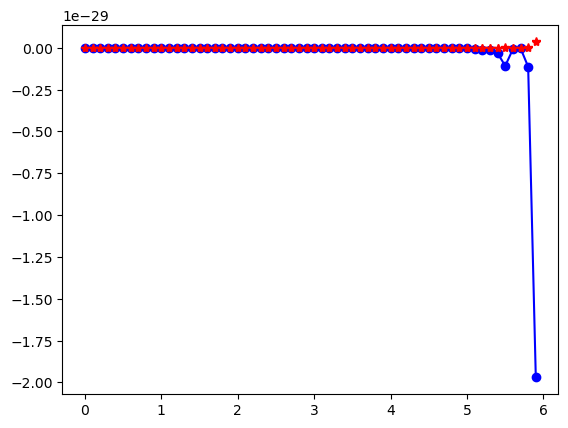

In [7]:
E = []
Mag = []
for j in np.arange(0,6,0.1):
    et, e0, m0 = ITEBD(2,20,1.0,j,0.01,10)
    E.append(et)
    Mag.append(m0)

h = np.arange(0,6,0.1)

print(len(h))
print(len(E))
plt.plot(h,E,'-o',c='b')
plt.plot(h,Mag,'*',c='r')
plt.show()